# The Factors Effecting Loan Amounts and the BorrowerAPR.

## Investigation Overview

In this Investigation, I wanted to examine the different variables that impact how much a Borrower is allowed to receive from the lender, and how the APR and Interest rates on their loan are determined. The primary focus was on how the Loan Amount, the Borrowers Prosper Risk Rating, Credit rating, Income and Loan Term can affect the Rates charged on the loan. 

## Dataset Overview

To begin with, this Prosper Loan dataset contained 113,937 loans with 81 variables for each loan recorded. The data contained information about the Borrowers credit and risk ratings, loan amounts, loan listing categories, employment status, Income Ranges, APR and Interest rates, loan term among many others. As part of the data wrangling process, I removed the data points that had a Prosper score of 11. The Scoring system should only be for 1-10, with 10 being the best. When exploring the prosper score with subplots, it was necessary to drop this inaccurate data, as such scores are incorrect.

In [11]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [12]:
#Load In the dataset
L = pd.read_csv('prosperLoanData.csv')

#Data Wrangling carried out
# Only leave the columns of interest in the dataframe
InterestingColumns = ['LoanKey', 'ListingCategory (numeric)', 'Occupation', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'BorrowerRate', 'LoanOriginationDate', 'BorrowerState', 'Investors', 'IncomeRange', 'StatedMonthlyIncome', 'LenderYield', 'Term', 'CreditGrade', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'MonthlyLoanPayment', 'ProsperScore']
#New DF created
Loan = L[InterestingColumns]

#Replace ListingCategory numbers with their associated meanings
Loan.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

#Rename Column name
Loan.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

#Convert LoanDate to datetime format for plotting purposes
Loan["LoanOriginationDate"]= pd.to_datetime(Loan["LoanOriginationDate"])

IncorrectProsperScore = Loan[Loan['ProsperScore'] == 11].index

#Remove 1456 rows that contain ProsperScores of 11. ProsperScoring should only have ratings 1-10
Loan.drop(IncorrectProsperScore , inplace=True)
Loan.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

(112481, 22)

## Prosper Risk Rating vs. Loan Amount


It is evident that borrowers with higher Prosper Ratings are taking out larger loans of between $14-16000 for longer terms than those with low Prosper ratings. Borrowers with low ratings of D-HR have notably acquired loans of lower amounts, and in most cases on shorter term loans. 

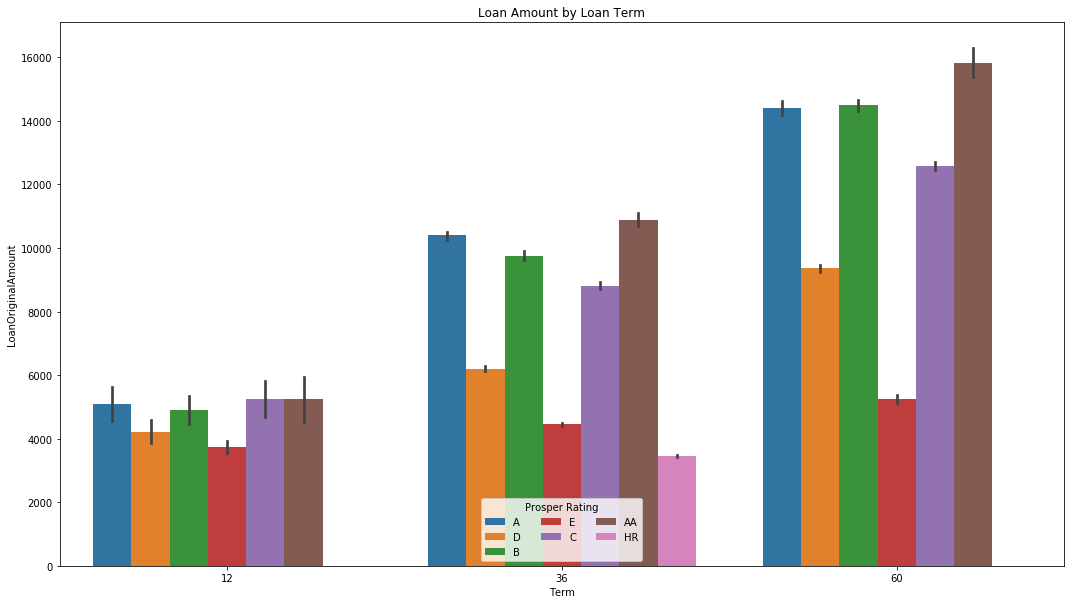

In [13]:
plt.figure(figsize = [18,10])
ab = sb.barplot(data=Loan, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ab.legend(loc=8, ncol = 3, title = 'Prosper Rating')
plt.xticks(rotation=0)
plt.title("Loan Amount by Loan Term");

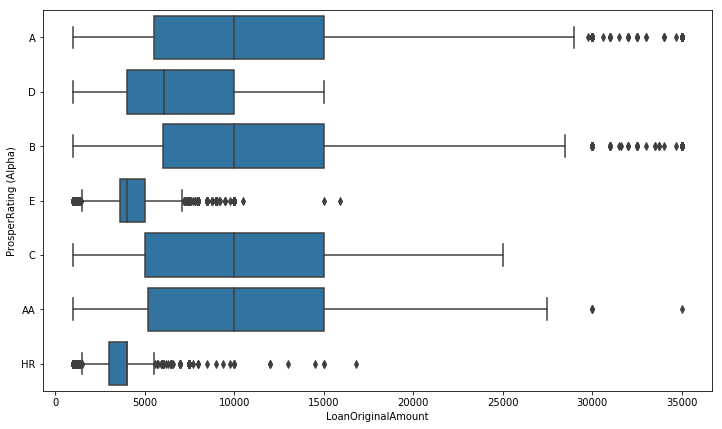

In [14]:
plt.figure(figsize = [12, 7])
base_color = sb.color_palette()[0]
sb.boxplot(data = Loan, x = 'LoanOriginalAmount', y = 'ProsperRating (Alpha)', color = base_color)

## Impact of Credit Grades on BorrowerAPR

The Credit Ratings of Borrowers have a direct impact on the Loans Annual percentage rates. Borrowers with strong credit ratings have a lower APR value compared to those with low-mid level ratings. Borrowers with a good record of past credit repayments appear to be rewarded by being offered lower Annual Percentage rates on their loans. We can see that Ratings of AA,A,B are all have notably lower APR % than other grades. Likewise the ProsperRisk rating on a loan is found to have a direct effect on the rates charged on a loan. 

(-0.045597791818056024, 0.56652779181805601)

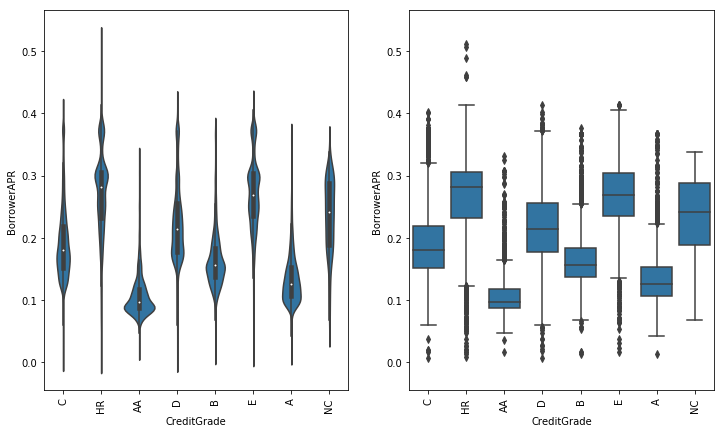

In [15]:
plt.figure(figsize = [12, 7])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
ax1 = sb.violinplot(data = Loan, x = 'CreditGrade', y = 'BorrowerAPR', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = Loan, x = 'CreditGrade', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation=90)
plt.ylim(ax1.get_ylim())

## Multivarite Analysis - Prosper Rating effect on the relationship between the Loan Amount and APR

The Loans with better Prosper ratings such as AA, A, B have a much lower APR charge than those with lower ratings. In AA for example, you can see a clear shift left to indicate a lower APR compared to the D rating directly above it. It is also very evident here that low risk rated loans are larger than higher risk loans, which are more common for smaller amounts at a higher interest rate from the lender.

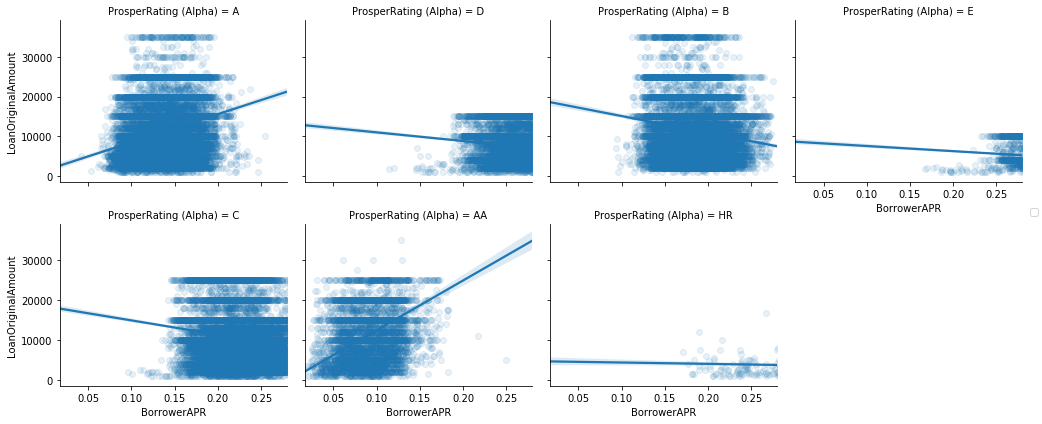

In [16]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=Loan, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

## Effect of Borrower Income Ranges on Loan Amounts 

Borrower's belonging to the high-income ranges were borrowing the largest amounts from the lender. Average loan amounts borrowed by those in the highest two income ranges are significantly greater than the lower ranges. This was expected, as those with high incomes are more readily able to make loan repayments, no matter how large the amount.

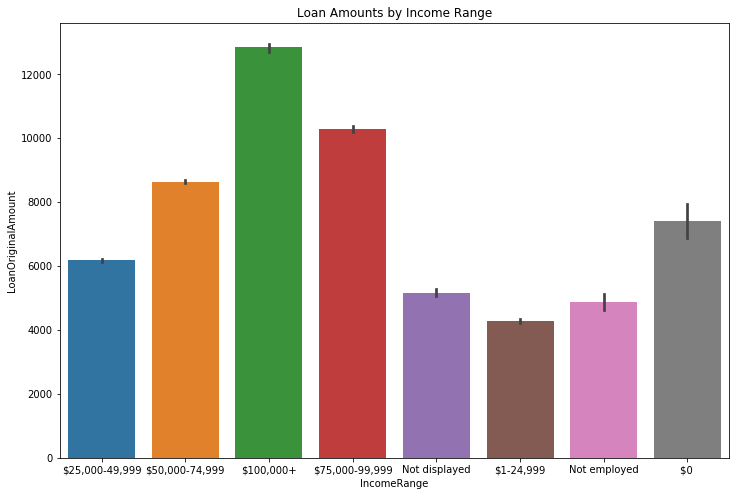

In [17]:
plt.figure(figsize = [12,8])
ab = sb.barplot(data=Loan, x = 'IncomeRange', y = 'LoanOriginalAmount', order=Loan['IncomeRange'].value_counts().iloc[:10].index)
plt.xticks(rotation=0)
plt.title("Loan Amounts by Income Range");

## Prosper Rating & BorrowerAPR by Loan Term

The top ProsperRatings Loans have a much lower APR value compared to the others. Loans with strong ratings and 60 month loan terms are shown to have a higher APR than 12 and 36 month loans, while the opposite can be seen for C,D and E prosper ratings, were this is reversed. Lenders see top ProsperRated loans as low risk, so they can afford to allow long term loans, while still making a steady profit. Low ratings are higher risk loans, hence why the APR is higher for the borrower.

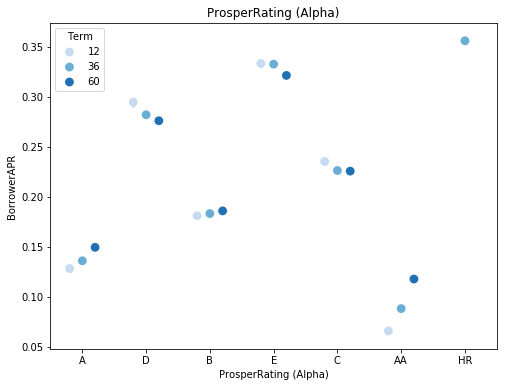

In [18]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = Loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('ProsperRating (Alpha)')
plt.ylabel('BorrowerAPR')
plt.show();

In [ ]:
!jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --template output_toggle